In [192]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

file = './data/aibs_aggregated_ephys_v6_plus_pred_genes.csv'

csv = pd.read_csv(file)

# select features and create a new data frame for ephys analysis 

rmp = csv['vrest']
tau = csv['tau']
apthr = csv['threshold_v_long_square']
apamp = np.subtract(csv['peak_v_long_square'], csv['threshold_v_long_square'])
ahpamp = np.subtract(csv['threshold_v_long_square'], csv['fast_trough_v_long_square'])
aphw = np.multiply(csv['rheo_first_spike_hw'], 1000)
rheo = csv['threshold_i_long_square']
cap = np.multiply(np.divide(csv['tau'], csv['ri']), 1000)
maxfreq = csv['max_rate_long_square']
adratio = csv['max_rate_first_mean_adratio']
ri = csv['ri']
sag = csv['sag']
f_i_curve_slope = csv['f_i_curve_slope']
avg_isi = csv['avg_isi']
latency = csv['latency']

f_cols = [rmp, tau, apthr, apamp, ahpamp, aphw, rheo, cap, maxfreq, 
          adratio, ri, sag, f_i_curve_slope, avg_isi, latency]

features = pd.concat(f_cols, axis=1)

x_ephys = features.loc[:, :]

x_ephys = StandardScaler().fit_transform(x_ephys)
features

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,vrest,tau,threshold_v_long_square,0,1,rheo_first_spike_hw,threshold_i_long_square,2,max_rate_long_square,max_rate_first_mean_adratio,ri,sag,f_i_curve_slope,avg_isi,latency
0,-70.435402,11.227194,-34.593750,66.750000,8.625000,0.90,90.000000,57.549005,30.0,0.788791,195.089281,0.098281,0.222768,77.791667,0.01380
1,-72.663834,19.112049,-45.312500,74.906250,17.218754,0.42,80.000000,114.437337,11.0,0.393129,167.008862,0.121829,0.054448,15.505000,0.02750
2,-61.285770,11.173000,-40.593750,78.093750,10.781250,0.64,59.999996,66.149182,26.0,0.476858,168.906093,0.061842,0.139005,120.311429,0.00822
3,-79.084755,7.046231,-40.250004,61.156254,6.625000,0.76,370.000000,87.394959,37.0,0.899592,80.625147,0.018195,0.255780,70.936923,0.07454
4,-76.090179,6.624722,-49.843750,93.187504,3.437500,0.54,130.000000,44.960973,26.0,0.086457,147.343829,0.067417,0.161611,79.521667,0.00616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,-74.269394,9.426861,-50.281254,84.156258,5.562496,0.64,29.999998,37.734397,54.0,0.417870,249.821424,0.121393,0.001625,21.474348,0.01146
884,-72.939285,12.571924,-40.781254,69.593756,9.031250,0.90,70.000000,57.885147,34.0,0.513917,217.187390,0.051299,0.220312,60.357500,0.01412
885,-72.137177,15.010612,-36.843750,65.843752,14.000004,0.68,50.000000,60.230643,56.0,0.497444,249.218866,0.066389,0.400171,38.891200,0.01844
886,-71.280716,21.670147,-47.093754,87.531254,9.781246,0.56,59.999996,93.582312,45.0,0.206032,231.562421,0.023629,0.311997,44.002727,0.02326


In [193]:
from sklearn.manifold import TSNE

# perform t-SNE on ephys dataframe

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(x_ephys)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 888 samples in 0.038s...
[t-SNE] Computed neighbors for 888 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 888 / 888
[t-SNE] Mean sigma: 1.026648
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.380379
[t-SNE] KL divergence after 1000 iterations: 1.125138


In [194]:
# create dataframe of t-SNE results and cre line data

tsneDf_ephys = pd.DataFrame(data=tsne_results, columns=['x_tsne', 'y_tsne'])
tsneDf_ephys = pd.concat([tsneDf_ephys, csv['mouse_line']], axis=1)

In [195]:
# upload cre line palette for plotting

cre = pd.read_csv('./data/driver_lines_anno.csv')

cre_line_palette = {}
for idx, row in cre.iterrows():
    cre_line_palette.update({row['driver_lines_label']:row['driver_lines_color']})
    
# add missing cre line entries

cre_line_palette.update({'Rorb-IRES2-Cre':'#2B8C88'})
cre_line_palette.update({'Esr2-IRES2-Cre-neo':'#5100FF'})
cre_line_palette.update({'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre':'#DF2166'})

cre_line_palette.update({'Vipr2-IRES2-Cre-neo':'#76958C'})
cre_line_palette.update({'Esr2-IRES2-Cre|PhiC31-neo':'#5100FF'})
cre_line_palette.update({'Esr2-IRES2-Cre-neo|PhiC31-neo':'#5100FF'})
cre_line_palette.update({'Pvalb-T2A-FlpO|Vipr2-IRES2-Cre':'#FF197F'})
cre_line_palette.update({'Pvalb-T2A-CreERT2':'#FF197F'})
cre_line_palette.update({'Nos1-CreERT2|Sst-IRES-FlpO':'#FFA500'}) #orange
cre_line_palette.update({'Chrna2-Cre_OE25|Pvalb-T2A-Dre':'#FF0000'}) #red
cre_line_palette.update({'Htr3a-Cre_NO152|Pvalb-T2A-Dre':'#C71585'}) #red purple
    
cre_line_palette

{'Calb1-IRES2-Cre': '#AA9C30',
 'Chat-IRES-Cre-neo': '#A90CC9',
 'Chrna2-Cre_OE25': '#E58A19',
 'Chrna2-Cre_OE25|Pvalb-T2A-Dre': '#FF0000',
 'Chrnb3-Cre_SM93': '#3479A6',
 'Crh-IRES-Cre_ZJH|Sst-IRES-FlpO': '#A64213',
 'Ctgf-T2A-dgCre': '#47797E',
 'Cux2-CreERT2': '#2D9CAB',
 'Esr2-IRES2-Cre': '#5100FF',
 'Etv1-CreERT2|Pvalb-T2A-FlpO': '#D44155',
 'Gad2-IRES-Cre': '#D98463',
 'Glt25d2-Cre_NF107': '#74B3A0',
 'Gng7-Cre_KH71': '#808B61',
 'Htr3a-Cre_NO152': '#DF6BC6',
 'Htr3a-Cre_NO152|Pvalb-T2A-Dre': '#C71585',
 'Htr3a-Cre_NO152|Sst-IRES-FlpO': '#CF790F',
 'Ndnf-IRES2-dgCre': '#C07B85',
 'Ndnf-IRES2-dgCre|Slc32a1-IRES2-FlpO': '#E36D83',
 'Nkx2-1-CreERT2': '#BD4656',
 'No Cre or Flp Driver': '#579172',
 'Nos1-CreERT2': '#D1993F',
 'Nos1-CreERT2|Sst-IRES-FlpO': '#FFA500',
 'Npy-IRES2-FlpO': '#D78473',
 'Nr5a1-Cre': '#43BCA9',
 'Ntsr1-Cre_GN220': '#70849A',
 'Oxtr-T2A-Cre': '#B8AE3E',
 'Oxtr-T2A-Cre|Pvalb-T2A-FlpO': '#CD3449',
 'Pdyn-T2A-CreERT2': '#BE8518',
 'Penk-IRES2-Cre-neo': '#9B6D97'

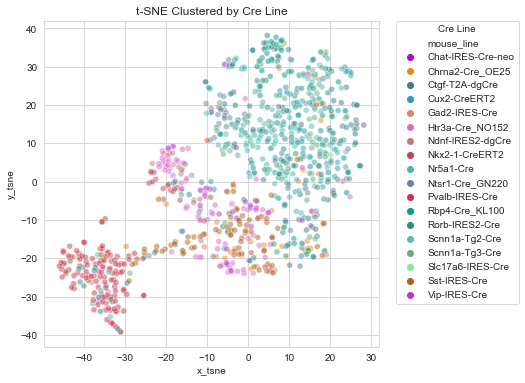

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot t-SNE clustered by Cre Line from ephys features

sns.set_style('whitegrid')
plt.figure(figsize=(6, 6))
plt.title('t-SNE Clustered by Cre Line')
ax = sns.scatterplot(data=tsneDf_ephys, x='x_tsne', y='y_tsne', hue='mouse_line', 
                     alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")
plt.show()

In [7]:
# collect gene expression values for analysis and store as a dataframe

x_gene = csv.iloc[:, 72:]
x_gene = StandardScaler().fit_transform(x_gene)

In [8]:
# perform t-SNE on the gene expression data

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(x_gene)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 888 samples in 0.267s...
[t-SNE] Computed neighbors for 888 samples in 14.004s...
[t-SNE] Computed conditional probabilities for sample 888 / 888
[t-SNE] Mean sigma: 18.785874
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.870224
[t-SNE] KL divergence after 1000 iterations: 1.117526


In [10]:
# create dataframe of t-SNE results and cre line data

tsneDf_gene = pd.DataFrame(data=tsne_results, columns=['x_tsne', 'y_tsne'])
tsneDf_gene = pd.concat([tsneDf_gene, csv['mouse_line']], axis=1)

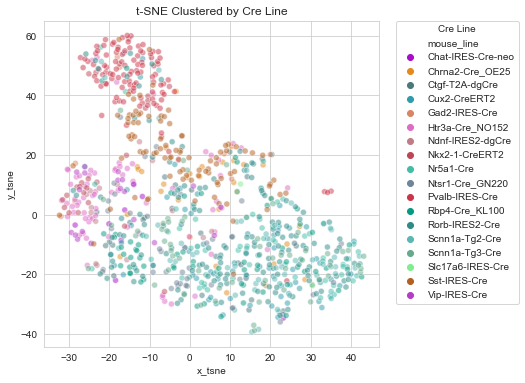

In [12]:
# plot t-SNE clustered by Cre Line from gene expression

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('t-SNE Clustered by Cre Line')
ax = sns.scatterplot(data=tsneDf_gene, x='x_tsne', y='y_tsne', hue='mouse_line', 
                     alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

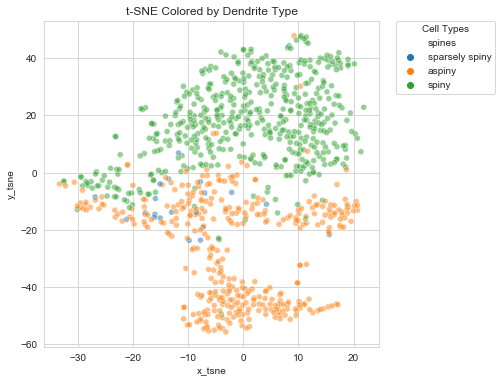

In [13]:
# plot t-SNE clustered by dendrite type from ephys features

tsneDf_ephys = pd.concat([tsneDf_ephys, csv['spines']], axis=1)

plt.figure(figsize=(6, 6))
plt.title('t-SNE Colored by Dendrite Type')
ax = sns.scatterplot(x="x_tsne", y="y_tsne", hue="spines", alpha=0.5, data=tsneDf_ephys)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cell Types")

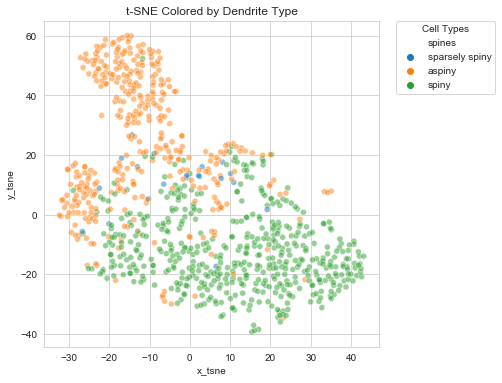

In [14]:
# t-SNE clustered by dendrite type from gene expression

tsneDf_gene = pd.concat([tsneDf_gene, csv['spines']], axis=1)

plt.figure(figsize=(6, 6))
plt.title('t-SNE Colored by Dendrite Type')
ax = sns.scatterplot(x="x_tsne", y="y_tsne", hue="spines", alpha=0.5, data=tsneDf_gene)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cell Types")

In [15]:
# Import external gene expression count file for validation

import pandas as pd

count_file = "./data/GSE71585_RefSeq_counts.csv"

count = pd.read_csv(count_file)
count = pd.DataFrame.transpose(count)
count.columns = count.iloc[0]
count = count[1:]
count

gene,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
Calb2_tdTpositive_cell_1,0,992,2.57,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,30931.2,3648.59,3648.59
Calb2_tdTpositive_cell_2,0,2287.02,177,0,0,816,0,0,0,0,...,0,0,0,0,0,0,0,10554,2773.93,2773.93
Calb2_tdTpositive_cell_3,0,491.78,0,0,0,84,0,0,0,169,...,0,0,0,0,0,0,0,1604.99,1120.42,1120.42
Calb2_tdTpositive_cell_4,0,1932,1,0,0,1662.18,0,0,0,1163.41,...,0,0,0,0,0,0,0,27674.5,3394.93,3394.93
Calb2_tdTpositive_cell_5,0,1425,2,0,0,2825.15,0,0,0,1,...,0,0,0,0,0,0,0,15887.5,5021.13,5021.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rbp4_CTX_10pg_5,0,502.95,53,704.01,0,86,15,0,0,1758.95,...,0,0,0,0,0,0,0,84838.7,19044,19044
Rbp4_CTX_10pg_6,0,1486.36,40.15,0,0,684.28,20,0,0,1,...,0,0,0,0,0,0,0,67577.9,12675.4,12675.4
Rbp4_CTX_250ng_1,8,956.4,1251,27,574.35,671,364.32,0,1,273.64,...,0,0,0,0,0,0,0,52727.9,0,0
Rbp4_CTX_250ng_2,9,1054.94,1356.2,37,570.86,835,464.22,0,0,292.83,...,0,0,0,0,0,0,0,50133.2,0,0


In [16]:
# sum the rows for cpm calculations and store into a dictionary

row_sums = {}

for idx, row in count.iterrows():
    row_sums[idx] = sum(row[:])
    
print(len(row_sums))

1809


In [17]:
# Convert each entry in transposed count matrix to log2(CPM + 1) 

import numpy as np

for idx, row in count.iterrows():
    row_sum = row_sums[idx]
    for col_name in count.columns:
        c = row[col_name]
        count.at[idx, col_name] = np.log2((c/row_sum)*1000000 + 1)
          
count    

gene,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
Calb2_tdTpositive_cell_1,0,6.16399,0.242665,0,0,0,0,0,0,0.0993286,...,0,0,0,0,0,0,0,11.107,8.0282,8.0282
Calb2_tdTpositive_cell_2,0,8.89823,5.24219,0,0,7.41685,0,0,0,0,...,0,0,0,0,0,0,0,11.1021,9.17617,9.17617
Calb2_tdTpositive_cell_3,0,7.33101,0,0,0,4.82432,0,0,0,5.80704,...,0,0,0,0,0,0,0,9.03126,8.51393,8.51393
Calb2_tdTpositive_cell_4,0,7.31699,0.11372,0,0,7.10144,0,0,0,6.59122,...,0,0,0,0,0,0,0,11.1489,8.12637,8.12637
Calb2_tdTpositive_cell_5,0,6.73787,0.199623,0,0,7.71853,0,0,0,0.103262,...,0,0,0,0,0,0,0,10.2044,8.54521,8.54521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rbp4_CTX_10pg_5,0,5.29272,2.32921,5.76736,0,2.91296,1.09709,0,0,7.07243,...,0,0,0,0,0,0,0,12.6538,10.4992,10.4992
Rbp4_CTX_10pg_6,0,7.17735,2.28771,0,0,6.06986,1.55295,0,0,0.133179,...,0,0,0,0,0,0,0,12.6743,10.2607,10.2607
Rbp4_CTX_250ng_1,0.393846,5.26775,5.6463,1.04221,4.55676,4.77229,3.93495,0,0.055524,3.55295,...,0,0,0,0,0,0,0,11.0153,0,0
Rbp4_CTX_250ng_2,0.419292,5.34104,5.69552,1.25493,4.48496,5.01307,4.20136,0,0,3.5818,...,0,0,0,0,0,0,0,10.8763,0,0


In [24]:
# save cpm matrix as a csv file for further use

count.to_csv('count_cpm.csv')

In [3]:
import pandas as pd

# upload cpm matrix

cpm = pd.read_csv('./data/count_cpm.csv', index_col=0)
cpm

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
Calb2_tdTpositive_cell_1,0.000000,6.163994,0.242665,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.099329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.106966,8.028197,8.028197
Calb2_tdTpositive_cell_2,0.000000,8.898234,5.242189,0.000000,0.000000,7.416847,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.102113,9.176166,9.176166
Calb2_tdTpositive_cell_3,0.000000,7.331013,0.000000,0.000000,0.000000,4.824316,0.000000,0.0,0.000000,5.807036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.031264,8.513932,8.513932
Calb2_tdTpositive_cell_4,0.000000,7.316986,0.113720,0.000000,0.000000,7.101436,0.000000,0.0,0.000000,6.591216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.148933,8.126369,8.126369
Calb2_tdTpositive_cell_5,0.000000,6.737874,0.199623,0.000000,0.000000,7.718525,0.000000,0.0,0.000000,0.103262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.204374,8.545211,8.545211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rbp4_CTX_10pg_5,0.000000,5.292725,2.329206,5.767356,0.000000,2.912956,1.097093,0.0,0.000000,7.072429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.653830,10.499220,10.499220
Rbp4_CTX_10pg_6,0.000000,7.177345,2.287714,0.000000,0.000000,6.069857,1.552945,0.0,0.000000,0.133179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.674260,10.260693,10.260693
Rbp4_CTX_250ng_1,0.393846,5.267751,5.646302,1.042213,4.556765,4.772291,3.934953,0.0,0.055524,3.552951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.015314,0.000000,0.000000
Rbp4_CTX_250ng_2,0.419292,5.341042,5.695523,1.254933,4.484960,5.013074,4.201357,0.0,0.000000,3.581796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.876303,0.000000,0.000000


In [74]:
x_count = StandardScaler().fit_transform(cpm)

In [75]:
# Perform t-SNE on cpm count matrix

from sklearn.manifold import TSNE 

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(x_count)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1809 samples in 1.688s...
[t-SNE] Computed neighbors for 1809 samples in 111.199s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1809
[t-SNE] Computed conditional probabilities for sample 1809 / 1809
[t-SNE] Mean sigma: 22.358824
[t-SNE] KL divergence after 250 iterations with early exaggeration: 129.335785
[t-SNE] KL divergence after 1000 iterations: 2.358468


In [76]:
# Get clustering information

cluster_file = './data/GSE71585_Clustering_Results.csv'

cluster_df = pd.read_csv(cluster_file)

# Cre line 
cre = cluster_df['cre_driver_1']
# tdTomato
td = cluster_df['tdTomato']
# pass QC checks
qc = cluster_df['pass_qc_checks']
# broad type
broad = cluster_df['broad_type']

In [78]:
# Add clustering information to t-SNE dataframe

tsneDf_count = pd.DataFrame(data=tsne_results, columns=['x_tsne', 'y_tsne'])
tsneDf_count = pd.concat([tsneDf_count, cre, td, qc, broad], axis=1)

# drop 289 cells with missing cre line palette information
missing_cre = ['Tac2-IRES2-Cre', 'Calb2-IRES-Cre', 'Trib2-2A-CreERT2', 'Chat-IRES-Cre', 'Ctgf-2A-dgCre', 'Pvalb-2A-DreO', 'CAV2-Cre', 'Pvalb-2A-FlpO']

for i, r in tsneDf_count.iterrows():
    if r['cre_driver_1'] in missing_cre:
        tsneDf_count = tsneDf_count.drop(i)
        
# make copy of tsneDf_count for visualization
tsneDf_count_copy = tsneDf_count
        
# Filter rows with unwanted cells
for i, r in tsneDf_count.iterrows():
    if r['tdTomato'] != 'positive': 
        tsneDf_count = tsneDf_count.drop(i)
    elif r['pass_qc_checks'] != 'Y':
        tsneDf_count = tsneDf_count.drop(i)
    elif r['broad_type'] != 'GABA-ergic Neuron' and r['broad_type'] != 'Glutamatergic Neuron':
        tsneDf_count = tsneDf_count.drop(i)
        

tsneDf_count


,x_tsne,y_tsne,cre_driver_1,tdTomato,pass_qc_checks,broad_type
43,-7.339138,2.210482,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
44,9.713469,-2.270236,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
45,-10.743547,9.259804,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
46,5.508607,0.311862,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
47,-10.750278,8.349267,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
...,...,...,...,...,...,...
1804,-69.210831,22.199881,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1805,10.173593,2.100467,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1806,16.071732,11.457478,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1807,16.072645,11.460041,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron


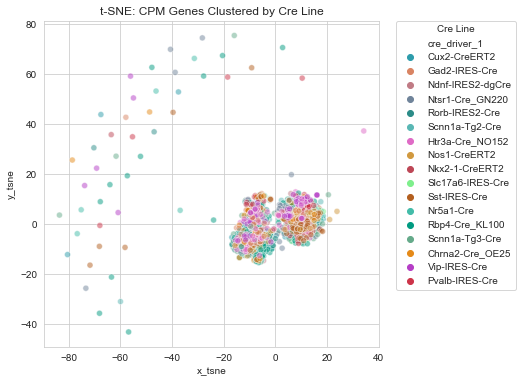

In [79]:
# Plot t-SNE results before filtering

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('t-SNE: CPM Genes Clustered by Cre Line')
ax = sns.scatterplot(data=tsneDf_count_copy, x='x_tsne', y='y_tsne', hue='cre_driver_1', 
                     alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

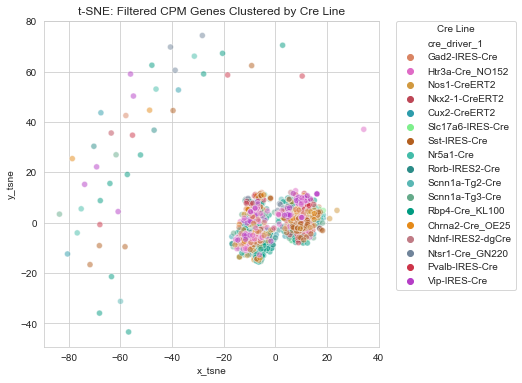

In [80]:
# Plot t-SNE results after filtering for tdTomato, pass_qc_checks, and broad_type

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('t-SNE: Filtered CPM Genes Clustered by Cre Line')
ax = sns.scatterplot(data=tsneDf_count, x='x_tsne', y='y_tsne', hue='cre_driver_1', 
                     alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

In [71]:
# UMAP

import umap

reducer = umap.UMAP()

embedding = reducer.fit_transform(cpm)

umapDf_count = pd.DataFrame(data=embedding, columns=['UMAP-1', 'UMAP-2'])
umapDf_count

,UMAP-1,UMAP-2
0,1.313059,-0.596603
1,1.608550,-0.959829
2,-3.051464,-1.299744
3,-0.072728,-1.395951
4,1.317614,-0.591816
...,...,...
1804,-2.079287,-1.977673
1805,-2.356937,-1.870212
1806,-3.378590,-0.966711
1807,-3.381784,-1.054468


In [72]:
# Add clustering information to UMAP dataframe

# tdTomato
td = cluster_df['tdTomato']
# pass QC checks
qc = cluster_df['pass_qc_checks']
# broad type
broad = cluster_df['broad_type']

umapDf_count = pd.concat([umapDf_count, cre, td, qc, broad], axis=1)

# drop 289 cells with missing cre line palette information
missing_cre = ['Tac2-IRES2-Cre', 'Calb2-IRES-Cre', 'Trib2-2A-CreERT2', 'Chat-IRES-Cre', 'Ctgf-2A-dgCre', 'Pvalb-2A-DreO', 'CAV2-Cre', 'Pvalb-2A-FlpO']

for i, r in umapDf_count.iterrows():
    if r['cre_driver_1'] in missing_cre:
        umapDf_count = umapDf_count.drop(i)
        
umapDf_count       

,UMAP-1,UMAP-2,cre_driver_1,tdTomato,pass_qc_checks,broad_type
5,-2.596427,-1.416524,Cux2-CreERT2,negative,Y,Astrocyte
6,-1.988044,-1.556948,Cux2-CreERT2,negative,Y,Astrocyte
7,-2.403518,-1.142918,Cux2-CreERT2,negative,Y,Astrocyte
8,-2.647504,-1.132464,Cux2-CreERT2,negative,Y,Astrocyte
9,-2.447304,-1.214550,Cux2-CreERT2,negative,Y,Astrocyte
...,...,...,...,...,...,...
1804,-2.079287,-1.977673,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1805,-2.356937,-1.870212,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1806,-3.378590,-0.966711,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1807,-3.381784,-1.054468,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron


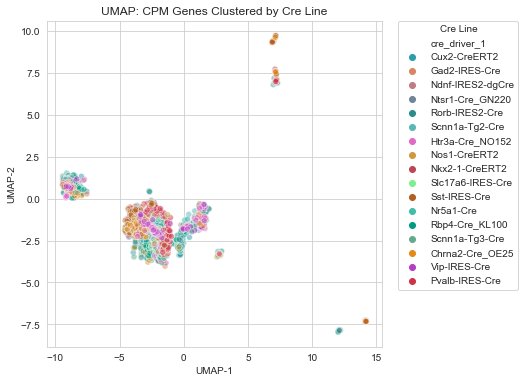

In [81]:
# Plot umap results using Seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('UMAP: CPM Genes Clustered by Cre Line')
ax = sns.scatterplot(data=umapDf_count, x='UMAP-1', y='UMAP-2', hue='cre_driver_1', 
                     alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

In [91]:
# Filter out based on clustering properties

umapDf_cpm_filtered = umapDf_count

for i, r in umapDf_cpm_filtered.iterrows():
    if r['tdTomato'] != 'positive': 
        umapDf_cpm_filtered = umapDf_cpm_filtered.drop(i)
    elif r['pass_qc_checks'] != 'Y':
        umapDf_cpm_filtered = umapDf_cpm_filtered.drop(i)
    elif r['broad_type'] != 'GABA-ergic Neuron' and r['broad_type'] != 'Glutamatergic Neuron':
        umapDf_cpm_filtered = umapDf_cpm_filtered.drop(i)
        
umapDf_cpm_filtered

,UMAP-1,UMAP-2,cre_driver_1,tdTomato,pass_qc_checks,broad_type
43,0.870328,-1.555189,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
44,-2.344360,-1.060404,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
45,7.148497,7.098227,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
46,-2.665650,-1.047677,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
47,7.058011,6.932994,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
...,...,...,...,...,...,...
1804,-2.079287,-1.977673,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1805,-2.356937,-1.870212,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1806,-3.378590,-0.966711,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1807,-3.381784,-1.054468,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron


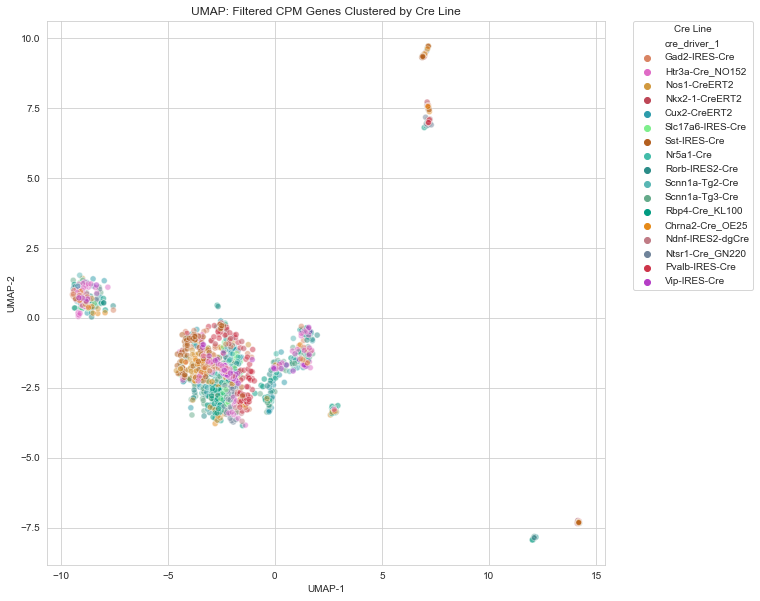

In [93]:
# Plot filtered results using Seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.title('UMAP: Filtered CPM Genes Clustered by Cre Line')
ax = sns.scatterplot(data=umapDf_cpm_filtered, x='UMAP-1', y='UMAP-2', hue='cre_driver_1', 
                     alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

In [43]:
# Get a list of gene names from known genes 

gene_names = pd.read_csv('./data/entrenz_symbol_s.csv')
gene_names.columns = ['entrez_ID', 'gene']

# define a dictionary of the gene names information
names = {}
for _, row in gene_names.iterrows():
    names[row['entrez_ID']] = row['gene']
names

{66050: '0610009B22Rik',
 66838: '0610009L18Rik',
 66839: '0610009O20Rik',
 71675: '0610010F05Rik',
 104457: '0610010K14Rik',
 68347: '0610011F06Rik',
 106264: '0610012G03Rik',
 68364: '0610030E20Rik',
 74098: '0610037L13Rik',
 67672: '0610040B10Rik',
 66117: '1110001J03Rik',
 100043040: '1110002L01Rik',
 68001: '1110004E09Rik',
 56372: '1110004F10Rik',
 68480: '1110007C09Rik',
 67388: '1110008F13Rik',
 66132: '1110008L16Rik',
 73737: '1110008P14Rik',
 68618: '1110012L19Rik',
 68941: '1110018N20Rik',
 76311: '1110019D14Rik',
 68721: '1110032A03Rik',
 68725: '1110032F04Rik',
 73747: '1110034G24Rik',
 66185: '1110037F02Rik',
 68763: '1110038B12Rik',
 117171: '1110038F14Rik',
 68808: '1110046J04Rik',
 228356: '1110051M20Rik',
 68832: '1110057K04Rik',
 68002: '1110058L19Rik',
 66206: '1110059E24Rik',
 66202: '1110059G10Rik',
 68920: '1110065P20Rik',
 68861: '1190002N15Rik',
 544717: '1190007I07Rik',
 66874: '1200014J11Rik',
 100043489: '1300002E11Rik',
 319830: '1500004A13Rik',
 76505: '15

In [19]:
# Find all matching gene names between entrez mapping and cpm matrix

match = []
for _, row in gene_names.iterrows():
    if row['gene'] in cpm.columns:
        match.append(row['gene'])
        
len(match)

10446

In [129]:
# Filter cpm for the matching genes, minus the last 5 which weren't predicted

cpm_match = cpm[match[:-5]]
cpm_match

,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040B10Rik,...,Zswim3,Zswim4,Zswim6,Zswim7,Zufsp,Zw10,Zwint,Zxda,Zxdb,Zxdc
Calb2_tdTpositive_cell_1,0.099329,0.000000,7.186024,6.479590,0.099329,5.334297,1.125005,5.747747,3.657388,0.000000,...,0.000000,0.000000,0.000000,6.470458,0.000000,6.300750,9.942653,1.030513,0.000000,0.000000
Calb2_tdTpositive_cell_2,0.000000,0.000000,0.000000,0.000000,5.919606,6.666110,2.366090,1.612065,6.506794,0.000000,...,0.000000,0.000000,0.000000,0.272844,0.502203,0.000000,10.464241,0.564457,0.000000,0.262866
Calb2_tdTpositive_cell_3,5.807036,0.000000,0.000000,0.000000,0.000000,5.457756,0.000000,2.037043,4.054657,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.367643,1.555428,0.000000,0.000000
Calb2_tdTpositive_cell_4,6.591216,0.000000,0.000000,0.113720,5.635640,0.577334,1.698472,1.265002,5.670928,0.000000,...,7.188292,0.000000,0.000000,0.113720,0.000000,0.000000,9.361792,0.375973,0.000000,0.000000
Calb2_tdTpositive_cell_5,0.103262,0.000000,0.103262,0.000000,0.103262,3.710641,1.311363,1.278644,8.902040,0.000000,...,0.000000,5.787632,0.000000,0.000000,0.000000,0.000000,10.073798,0.944500,0.000000,0.103262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rbp4_CTX_10pg_5,7.072429,0.000000,0.105609,0.000000,2.807346,4.915390,1.964496,6.111459,5.838801,0.000000,...,0.204012,0.105609,0.000000,0.105609,0.105609,5.295657,8.881620,0.169356,0.105609,0.970848
Rbp4_CTX_10pg_6,0.133179,0.000000,4.373536,5.883246,4.413366,5.231102,0.931395,1.745409,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.133179,0.000000,8.769864,0.641489,0.000000,0.000000
Rbp4_CTX_250ng_1,3.552951,1.222829,4.861311,5.758924,3.735549,3.267604,4.756126,4.782137,4.348254,0.986165,...,3.535287,4.301280,5.313464,2.599676,2.918825,4.248652,8.515573,3.345462,4.882000,4.839610
Rbp4_CTX_250ng_2,3.581796,1.764845,5.016468,5.660464,4.006302,3.568961,5.025178,4.660576,4.266123,1.008497,...,3.427943,4.425065,5.346314,2.651665,2.815838,4.356042,8.554421,3.315466,4.870968,4.953251


In [63]:
# Run UMAP on reduced cpm matrix

import umap

reducer = umap.UMAP()

embedding = reducer.fit_transform(cpm_match)

umapDf_cpm_match = pd.DataFrame(data=embedding, columns=['UMAP-1', 'UMAP-2'])
umapDf_cpm_match

,UMAP-1,UMAP-2
0,1.316571,-0.198880
1,1.412925,-0.278228
2,3.834232,-2.148163
3,3.382509,-1.255893
4,1.340029,-0.241008
...,...,...
1804,2.560670,-0.933197
1805,2.564780,-0.845035
1806,2.894507,-0.357912
1807,2.887877,-0.424332


In [64]:
# Add clustering information to UMAP dataframe

# tdTomato
td = cluster_df['tdTomato']
# pass QC checks
qc = cluster_df['pass_qc_checks']
# broad type
broad = cluster_df['broad_type']

umapDf_cpm_match = pd.concat([umapDf_cpm_match, cre, td, qc, broad], axis=1)

# drop 289 cells with missing cre line palette information
missing_cre = ['Tac2-IRES2-Cre', 'Calb2-IRES-Cre', 'Trib2-2A-CreERT2', 'Chat-IRES-Cre', 'Ctgf-2A-dgCre', 'Pvalb-2A-DreO', 'CAV2-Cre', 'Pvalb-2A-FlpO']

for i, r in umapDf_cpm_match.iterrows():
    if r['cre_driver_1'] in missing_cre:
        umapDf_cpm_match = umapDf_cpm_match.drop(i)

# Filter out based on clustering properties

for i, r in umapDf_cpm_match.iterrows():
    if r['tdTomato'] != 'positive': 
        umapDf_cpm_match = umapDf_cpm_match.drop(i)
    elif r['pass_qc_checks'] != 'Y':
        umapDf_cpm_match = umapDf_cpm_match.drop(i)
    elif r['broad_type'] != 'GABA-ergic Neuron' and r['broad_type'] != 'Glutamatergic Neuron':
        umapDf_cpm_match = umapDf_cpm_match.drop(i)
        
umapDf_cpm_match

,UMAP-1,UMAP-2,cre_driver_1,tdTomato,pass_qc_checks,broad_type
43,2.253200,-1.284786,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
44,2.740966,-1.266844,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
45,-10.716589,-7.796648,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
46,2.905880,-1.130433,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
47,-10.614596,-7.866314,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
...,...,...,...,...,...,...
1804,2.560670,-0.933197,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1805,2.564780,-0.845035,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1806,2.894507,-0.357912,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1807,2.887877,-0.424332,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron


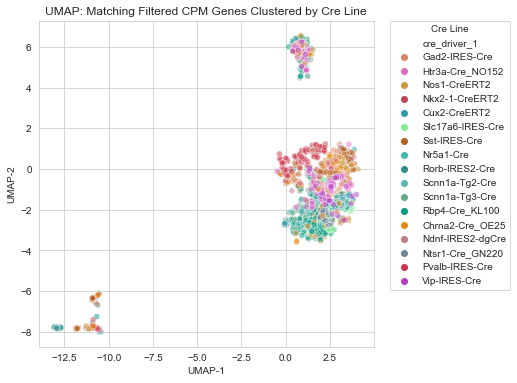

In [197]:
# Plot the matching 10446 genes with Seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('UMAP: Matching Filtered CPM Genes Clustered by Cre Line')
ax = sns.scatterplot(data=umapDf_cpm_match, x='UMAP-1', y='UMAP-2', hue='cre_driver_1', 
                     alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

In [47]:
# Get 10000 most variable genes from prediction stage

top = pd.read_csv('data/top10000.csv', index_col=0)

# get list of the top 10000 gene names from entrez ID

top_names = []
for _, row in top.iterrows():
    if row['entrez_ID'] in names:
        top_names.append(names[row['entrez_ID']])

len(top_names)

111

In [121]:
# Concatenate genes from the predicted and reduced cpm matrices

# Get predicted genes

predicted = pd.read_csv('data/aibs_aggregated_ephys_v6_plus_pred_genes.csv', index_col=0)
predicted_genes = predicted.iloc[:, 71:]

# Filter for genes that match with the cpm matrix

predicted_match = predicted_genes[match[:-5]]
predicted_match


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040B10Rik,...,Zswim3,Zswim4,Zswim6,Zswim7,Zufsp,Zw10,Zwint,Zxda,Zxdb,Zxdc
0,5.902492,1.034156,1.716337,4.671704,6.186726,4.762412,7.738280,2.054278,6.577820,0.725896,...,0.971307,0.480331,0.607688,2.687541,3.574178,2.637170,11.987054,0.871865,1.074022,1.446503
3,6.211977,1.744017,1.691299,5.643650,5.832232,6.014835,8.131753,3.233786,6.221440,0.758565,...,2.495462,1.126695,2.048971,2.883197,1.689263,1.631348,12.716197,0.860673,2.648394,2.041673
4,6.984668,3.778198,1.752441,5.510414,7.043078,5.772715,8.168246,1.395977,7.178798,1.186809,...,0.660809,1.540257,0.373993,4.182668,3.691104,2.149267,12.815735,0.645794,1.228161,1.134477
6,6.072481,0.047143,1.391488,6.744357,6.190386,4.893464,8.153345,3.300945,6.039397,0.336385,...,1.749926,-0.781631,2.265397,5.120330,3.902825,2.651738,11.477546,1.700841,1.329324,2.051436
7,6.219021,1.494553,1.554885,6.458524,6.875932,5.506890,8.133080,2.937742,6.441002,0.838430,...,0.419570,-0.675809,1.554855,3.603176,2.330889,1.153689,11.494855,1.329170,1.853685,1.189222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,6.259142,0.904862,1.994728,5.387983,6.590189,5.613701,8.147990,3.193088,6.891242,0.728791,...,1.131509,-0.906879,0.935610,2.671735,2.351349,1.418911,12.263394,1.052659,1.777042,1.310591
1054,5.962156,0.869726,1.916598,4.924914,6.099838,5.103391,7.707817,2.615550,6.588199,0.689993,...,1.468626,0.088339,0.951610,2.595094,3.063739,2.601506,12.171259,0.965772,1.327621,1.392658
1055,6.182835,1.170601,1.951344,4.805479,5.896013,5.271098,7.714158,2.501949,6.695430,0.735262,...,1.424310,0.752402,0.813047,2.412768,3.117535,2.856625,12.518279,0.675469,1.465563,1.647903
1056,6.744828,2.139469,1.767829,6.782498,6.424461,6.123884,8.259641,3.340638,6.442112,1.175286,...,1.723042,0.659144,1.476944,4.324246,2.805036,2.102456,12.654096,1.070553,2.132996,2.241511


In [102]:
# Run UMAP on the predicted genes

reducer = umap.UMAP()

embedding = reducer.fit_transform(predicted_match)

umapDf_predicted_match = pd.DataFrame(data=embedding, columns=['UMAP-1', 'UMAP-2'])
umapDf_predicted_match

,UMAP-1,UMAP-2
0,3.376160,-6.012538
1,-1.253877,5.528770
2,3.285237,-4.616028
3,4.515542,1.280828
4,3.911285,-8.182352
...,...,...
883,4.139888,-8.473963
884,3.496890,-5.952553
885,3.486364,-5.704243
886,3.664255,3.076514


In [103]:
# Add cre line information to UMAP dataframe

predicted_cre = predicted['mouse_line']
predicted_cre.reset_index(drop=True, inplace=True)

umapDf_predicted_match = pd.concat([umapDf_predicted_match, predicted['mouse_line']], axis=1)
umapDf_predicted_match

,UMAP-1,UMAP-2,mouse_line
0,3.376160,-6.012538,Chat-IRES-Cre-neo
1,-1.253877,5.528770,Chat-IRES-Cre-neo
2,3.285237,-4.616028,Chat-IRES-Cre-neo
3,4.515542,1.280828,Chat-IRES-Cre-neo
4,3.911285,-8.182352,Chat-IRES-Cre-neo
...,...,...,...
883,4.139888,-8.473963,Vip-IRES-Cre
884,3.496890,-5.952553,Vip-IRES-Cre
885,3.486364,-5.704243,Vip-IRES-Cre
886,3.664255,3.076514,Vip-IRES-Cre


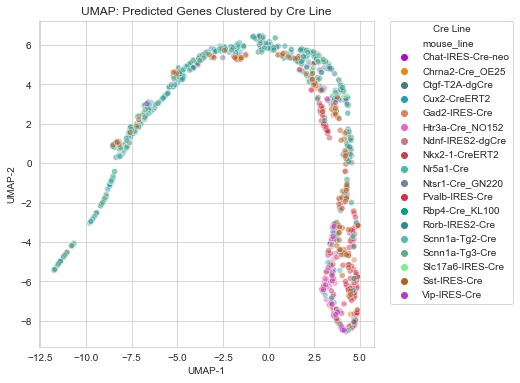

In [104]:
# plot UMAP clustered by Cre Line from gene expression

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('UMAP: Predicted Genes Clustered by Cre Line')
ax = sns.scatterplot(data=umapDf_predicted_match, x='UMAP-1', y='UMAP-2', hue='mouse_line', 
                     alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

In [105]:
for idx, row in umapDf_predicted_match.iterrows():
    umapDf_predicted_match.loc[idx, 'predicted'] = True
    
umapDf_predicted_match  

,UMAP-1,UMAP-2,mouse_line,predicted
0,3.376160,-6.012538,Chat-IRES-Cre-neo,True
1,-1.253877,5.528770,Chat-IRES-Cre-neo,True
2,3.285237,-4.616028,Chat-IRES-Cre-neo,True
3,4.515542,1.280828,Chat-IRES-Cre-neo,True
4,3.911285,-8.182352,Chat-IRES-Cre-neo,True
...,...,...,...,...
883,4.139888,-8.473963,Vip-IRES-Cre,True
884,3.496890,-5.952553,Vip-IRES-Cre,True
885,3.486364,-5.704243,Vip-IRES-Cre,True
886,3.664255,3.076514,Vip-IRES-Cre,True


In [107]:
for idx, row in umapDf_cpm_match.iterrows():
    umapDf_cpm_match.loc[idx, 'predicted'] = False
    
umapDf_cpm_match 

,UMAP-1,UMAP-2,cre_driver_1,tdTomato,pass_qc_checks,broad_type,predicted
43,2.253200,-1.284786,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron,False
44,2.740966,-1.266844,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron,False
45,-10.716589,-7.796648,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron,False
46,2.905880,-1.130433,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron,False
47,-10.614596,-7.866314,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron,False
...,...,...,...,...,...,...,...
1804,2.560670,-0.933197,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron,False
1805,2.564780,-0.845035,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron,False
1806,2.894507,-0.357912,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron,False
1807,2.887877,-0.424332,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron,False


In [ ]:
# CONCATENATION
#
#
#

In [135]:
# Filter cpm matrix for classification after future UMAP

td = cluster_df['tdTomato'] ### tdTomato
qc = cluster_df['pass_qc_checks'] ### pass QC checks
broad = cluster_df['broad_type'] ### broad type

cpm_match_filtered = cpm_match
cpm_match_filtered.reset_index(drop=True, inplace=True)
cpm_match_filtered = pd.concat([cpm_match_filtered, cre, td, qc, broad], axis=1)
        
cpm_match_filtered

,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040B10Rik,...,Zufsp,Zw10,Zwint,Zxda,Zxdb,Zxdc,cre_driver_1,tdTomato,pass_qc_checks,broad_type
0,0.099329,0.000000,7.186024,6.479590,0.099329,5.334297,1.125005,5.747747,3.657388,0.000000,...,0.000000,6.300750,9.942653,1.030513,0.000000,0.000000,Calb2-IRES-Cre,positive,Y,Astrocyte
1,0.000000,0.000000,0.000000,0.000000,5.919606,6.666110,2.366090,1.612065,6.506794,0.000000,...,0.502203,0.000000,10.464241,0.564457,0.000000,0.262866,Calb2-IRES-Cre,positive,Y,Astrocyte
2,5.807036,0.000000,0.000000,0.000000,0.000000,5.457756,0.000000,2.037043,4.054657,0.000000,...,0.000000,0.000000,9.367643,1.555428,0.000000,0.000000,Calb2-IRES-Cre,positive,Y,Astrocyte
3,6.591216,0.000000,0.000000,0.113720,5.635640,0.577334,1.698472,1.265002,5.670928,0.000000,...,0.000000,0.000000,9.361792,0.375973,0.000000,0.000000,Calb2-IRES-Cre,positive,Y,Astrocyte
4,0.103262,0.000000,0.103262,0.000000,0.103262,3.710641,1.311363,1.278644,8.902040,0.000000,...,0.000000,0.000000,10.073798,0.944500,0.000000,0.103262,Calb2-IRES-Cre,positive,Y,Astrocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,7.072429,0.000000,0.105609,0.000000,2.807346,4.915390,1.964496,6.111459,5.838801,0.000000,...,0.105609,5.295657,8.881620,0.169356,0.105609,0.970848,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1805,0.133179,0.000000,4.373536,5.883246,4.413366,5.231102,0.931395,1.745409,0.000000,0.000000,...,0.133179,0.000000,8.769864,0.641489,0.000000,0.000000,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1806,3.552951,1.222829,4.861311,5.758924,3.735549,3.267604,4.756126,4.782137,4.348254,0.986165,...,2.918825,4.248652,8.515573,3.345462,4.882000,4.839610,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1807,3.581796,1.764845,5.016468,5.660464,4.006302,3.568961,5.025178,4.660576,4.266123,1.008497,...,2.815838,4.356042,8.554421,3.315466,4.870968,4.953251,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron


In [137]:
# drop 289 cells with missing cre line palette information
missing_cre = ['Tac2-IRES2-Cre', 'Calb2-IRES-Cre', 'Trib2-2A-CreERT2', 'Chat-IRES-Cre', 'Ctgf-2A-dgCre', 'Pvalb-2A-DreO', 'CAV2-Cre', 'Pvalb-2A-FlpO']

# Filter out based on clustering properties

for i, r in cpm_match_filtered.iterrows():
    if r['cre_driver_1'] in missing_cre:
        cpm_match_filtered = cpm_match_filtered.drop(i)
    elif r['tdTomato'] != 'positive': 
        cpm_match_filtered = cpm_match_filtered.drop(i)
    elif r['pass_qc_checks'] != 'Y':
        cpm_match_filtered = cpm_match_filtered.drop(i)
    elif r['broad_type'] != 'GABA-ergic Neuron' and r['broad_type'] != 'Glutamatergic Neuron':
        cpm_match_filtered = cpm_match_filtered.drop(i)
        
cpm_match_filtered

,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040B10Rik,...,Zufsp,Zw10,Zwint,Zxda,Zxdb,Zxdc,cre_driver_1,tdTomato,pass_qc_checks,broad_type
43,0.000000,0.000000,0.000000,7.679372,6.073638,5.497161,2.770995,3.408425,7.001718,0.000000,...,7.767696,0.000000,10.748871,3.969484,0.000000,7.624861,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
44,5.510847,0.000000,4.367950,2.514902,0.000000,0.000000,1.678346,2.877808,0.000000,0.000000,...,7.188573,6.509698,10.165814,1.424661,0.000000,0.000000,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
45,6.963886,0.000000,4.233940,0.404837,0.000000,6.559103,1.740748,2.232474,3.586638,0.000000,...,7.641887,0.000000,0.404837,2.799189,0.000000,4.715373,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
46,0.000000,0.000000,0.000000,2.741785,6.580249,0.000000,1.075373,3.021413,0.000000,0.000000,...,0.334905,6.900721,10.347104,1.604641,6.580054,0.000000,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
47,7.082070,0.000000,8.595756,0.000000,0.000000,0.000000,1.728508,1.427129,5.974686,0.000000,...,0.000000,0.000000,0.366511,2.213667,0.000000,0.000000,Gad2-IRES-Cre,positive,Y,GABA-ergic Neuron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,7.072429,0.000000,0.105609,0.000000,2.807346,4.915390,1.964496,6.111459,5.838801,0.000000,...,0.105609,5.295657,8.881620,0.169356,0.105609,0.970848,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1805,0.133179,0.000000,4.373536,5.883246,4.413366,5.231102,0.931395,1.745409,0.000000,0.000000,...,0.133179,0.000000,8.769864,0.641489,0.000000,0.000000,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1806,3.552951,1.222829,4.861311,5.758924,3.735549,3.267604,4.756126,4.782137,4.348254,0.986165,...,2.918825,4.248652,8.515573,3.345462,4.882000,4.839610,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron
1807,3.581796,1.764845,5.016468,5.660464,4.006302,3.568961,5.025178,4.660576,4.266123,1.008497,...,2.815838,4.356042,8.554421,3.315466,4.870968,4.953251,Vip-IRES-Cre,positive,Y,GABA-ergic Neuron


In [142]:
# Drop the metadata filter columns for concatenation with predicted matrix

cpm_match_filtered_raw = cpm_match_filtered
cpm_match_filtered_raw = cpm_match_filtered_raw.drop(['cre_driver_1', 'tdTomato', 'pass_qc_checks', 'broad_type'], axis=1)
cpm_match_filtered_raw

,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040B10Rik,...,Zswim3,Zswim4,Zswim6,Zswim7,Zufsp,Zw10,Zwint,Zxda,Zxdb,Zxdc
43,0.000000,0.000000,0.000000,7.679372,6.073638,5.497161,2.770995,3.408425,7.001718,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.767696,0.000000,10.748871,3.969484,0.000000,7.624861
44,5.510847,0.000000,4.367950,2.514902,0.000000,0.000000,1.678346,2.877808,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.188573,6.509698,10.165814,1.424661,0.000000,0.000000
45,6.963886,0.000000,4.233940,0.404837,0.000000,6.559103,1.740748,2.232474,3.586638,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.641887,0.000000,0.404837,2.799189,0.000000,4.715373
46,0.000000,0.000000,0.000000,2.741785,6.580249,0.000000,1.075373,3.021413,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.157213,0.334905,6.900721,10.347104,1.604641,6.580054,0.000000
47,7.082070,0.000000,8.595756,0.000000,0.000000,0.000000,1.728508,1.427129,5.974686,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366511,2.213667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,7.072429,0.000000,0.105609,0.000000,2.807346,4.915390,1.964496,6.111459,5.838801,0.000000,...,0.204012,0.105609,0.000000,0.105609,0.105609,5.295657,8.881620,0.169356,0.105609,0.970848
1805,0.133179,0.000000,4.373536,5.883246,4.413366,5.231102,0.931395,1.745409,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.133179,0.000000,8.769864,0.641489,0.000000,0.000000
1806,3.552951,1.222829,4.861311,5.758924,3.735549,3.267604,4.756126,4.782137,4.348254,0.986165,...,3.535287,4.301280,5.313464,2.599676,2.918825,4.248652,8.515573,3.345462,4.882000,4.839610
1807,3.581796,1.764845,5.016468,5.660464,4.006302,3.568961,5.025178,4.660576,4.266123,1.008497,...,3.427943,4.425065,5.346314,2.651665,2.815838,4.356042,8.554421,3.315466,4.870968,4.953251


In [146]:
# Concatenate the cpm and predicted genes into a dataframe for combined UMAP (Order: PRED + CPM)

# add column to determine whether cell is from cpm or predicted matrix

for idx, row in cpm_match_filtered_raw.iterrows():
    cpm_match_filtered_raw.loc[idx, 'predicted'] = False
    
for idx, row in predicted_match.iterrows():
    predicted_match.loc[idx, 'predicted'] = True

combined = predicted_match.append(cpm_match_filtered_raw)
combined

,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040B10Rik,...,Zswim4,Zswim6,Zswim7,Zufsp,Zw10,Zwint,Zxda,Zxdb,Zxdc,predicted
0,5.902492,1.034156,1.716337,4.671704,6.186726,4.762412,7.738280,2.054278,6.577820,0.725896,...,0.480331,0.607688,2.687541,3.574178,2.637170,11.987054,0.871865,1.074022,1.446503,True
3,6.211977,1.744017,1.691299,5.643650,5.832232,6.014835,8.131753,3.233786,6.221440,0.758565,...,1.126695,2.048971,2.883197,1.689263,1.631348,12.716197,0.860673,2.648394,2.041673,True
4,6.984668,3.778198,1.752441,5.510414,7.043078,5.772715,8.168246,1.395977,7.178798,1.186809,...,1.540257,0.373993,4.182668,3.691104,2.149267,12.815735,0.645794,1.228161,1.134477,True
6,6.072481,0.047143,1.391488,6.744357,6.190386,4.893464,8.153345,3.300945,6.039397,0.336385,...,-0.781631,2.265397,5.120330,3.902825,2.651738,11.477546,1.700841,1.329324,2.051436,True
7,6.219021,1.494553,1.554885,6.458524,6.875932,5.506890,8.133080,2.937742,6.441002,0.838430,...,-0.675809,1.554855,3.603176,2.330889,1.153689,11.494855,1.329170,1.853685,1.189222,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,7.072429,0.000000,0.105609,0.000000,2.807346,4.915390,1.964496,6.111459,5.838801,0.000000,...,0.105609,0.000000,0.105609,0.105609,5.295657,8.881620,0.169356,0.105609,0.970848,False
1805,0.133179,0.000000,4.373536,5.883246,4.413366,5.231102,0.931395,1.745409,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.133179,0.000000,8.769864,0.641489,0.000000,0.000000,False
1806,3.552951,1.222829,4.861311,5.758924,3.735549,3.267604,4.756126,4.782137,4.348254,0.986165,...,4.301280,5.313464,2.599676,2.918825,4.248652,8.515573,3.345462,4.882000,4.839610,False
1807,3.581796,1.764845,5.016468,5.660464,4.006302,3.568961,5.025178,4.660576,4.266123,1.008497,...,4.425065,5.346314,2.651665,2.815838,4.356042,8.554421,3.315466,4.870968,4.953251,False


In [147]:
# Run UMAP on the combined matrix without the 'predicted' column

combined_raw = combined
combined_raw = combined_raw.drop('predicted', 1)
combined_raw

,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040B10Rik,...,Zswim3,Zswim4,Zswim6,Zswim7,Zufsp,Zw10,Zwint,Zxda,Zxdb,Zxdc
0,5.902492,1.034156,1.716337,4.671704,6.186726,4.762412,7.738280,2.054278,6.577820,0.725896,...,0.971307,0.480331,0.607688,2.687541,3.574178,2.637170,11.987054,0.871865,1.074022,1.446503
3,6.211977,1.744017,1.691299,5.643650,5.832232,6.014835,8.131753,3.233786,6.221440,0.758565,...,2.495462,1.126695,2.048971,2.883197,1.689263,1.631348,12.716197,0.860673,2.648394,2.041673
4,6.984668,3.778198,1.752441,5.510414,7.043078,5.772715,8.168246,1.395977,7.178798,1.186809,...,0.660809,1.540257,0.373993,4.182668,3.691104,2.149267,12.815735,0.645794,1.228161,1.134477
6,6.072481,0.047143,1.391488,6.744357,6.190386,4.893464,8.153345,3.300945,6.039397,0.336385,...,1.749926,-0.781631,2.265397,5.120330,3.902825,2.651738,11.477546,1.700841,1.329324,2.051436
7,6.219021,1.494553,1.554885,6.458524,6.875932,5.506890,8.133080,2.937742,6.441002,0.838430,...,0.419570,-0.675809,1.554855,3.603176,2.330889,1.153689,11.494855,1.329170,1.853685,1.189222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,7.072429,0.000000,0.105609,0.000000,2.807346,4.915390,1.964496,6.111459,5.838801,0.000000,...,0.204012,0.105609,0.000000,0.105609,0.105609,5.295657,8.881620,0.169356,0.105609,0.970848
1805,0.133179,0.000000,4.373536,5.883246,4.413366,5.231102,0.931395,1.745409,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.133179,0.000000,8.769864,0.641489,0.000000,0.000000
1806,3.552951,1.222829,4.861311,5.758924,3.735549,3.267604,4.756126,4.782137,4.348254,0.986165,...,3.535287,4.301280,5.313464,2.599676,2.918825,4.248652,8.515573,3.345462,4.882000,4.839610
1807,3.581796,1.764845,5.016468,5.660464,4.006302,3.568961,5.025178,4.660576,4.266123,1.008497,...,3.427943,4.425065,5.346314,2.651665,2.815838,4.356042,8.554421,3.315466,4.870968,4.953251


In [199]:
# Run UMAP on the combined raw matrix

reducer = umap.UMAP()

embedding = reducer.fit_transform(combined_raw)

umapDf_combined = pd.DataFrame(data=embedding, columns=['UMAP-1', 'UMAP-2'])
umapDf_combined

/opt/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


,UMAP-1,UMAP-2
0,11.915008,-5.336006
1,9.542183,3.478972
2,11.855972,-4.285520
3,12.160606,-0.691672
4,12.361315,-6.721456
...,...,...
2155,-8.795690,0.497536
2156,-8.746401,0.403332
2157,-9.879400,2.401979
2158,-9.879560,2.401466


In [200]:
# Re-add cre line and predicted columns to combined UMAP

cre = predicted['mouse_line'].append(cpm_match_filtered['cre_driver_1'])
cre.reset_index(drop=True, inplace=True)

pred = combined['predicted']
pred.reset_index(drop=True, inplace=True)

umapDf_combined = pd.concat([umapDf_combined, cre, pred], axis=1)
umapDf_combined.columns = ['UMAP-1', 'UMAP-2', 'cre', 'predicted']
umapDf_combined

,UMAP-1,UMAP-2,cre,predicted
0,11.915008,-5.336006,Chat-IRES-Cre-neo,True
1,9.542183,3.478972,Chat-IRES-Cre-neo,True
2,11.855972,-4.285520,Chat-IRES-Cre-neo,True
3,12.160606,-0.691672,Chat-IRES-Cre-neo,True
4,12.361315,-6.721456,Chat-IRES-Cre-neo,True
...,...,...,...,...
2155,-8.795690,0.497536,Vip-IRES-Cre,False
2156,-8.746401,0.403332,Vip-IRES-Cre,False
2157,-9.879400,2.401979,Vip-IRES-Cre,False
2158,-9.879560,2.401466,Vip-IRES-Cre,False


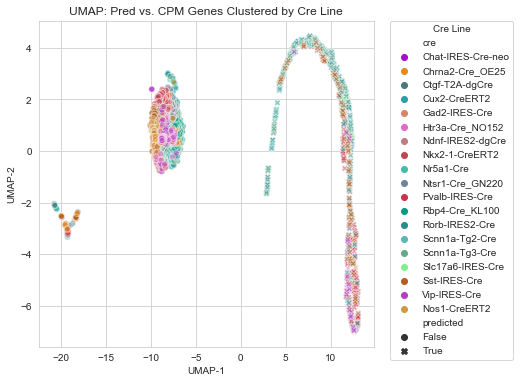

In [201]:
# Plot both predicted and cpm genes in one overlaying Seaborn plot

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('UMAP: Pred vs. CPM Genes Clustered by Cre Line')
ax = sns.scatterplot(data=umapDf_combined, x='UMAP-1', y='UMAP-2', hue='cre', 
                     style='predicted', alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

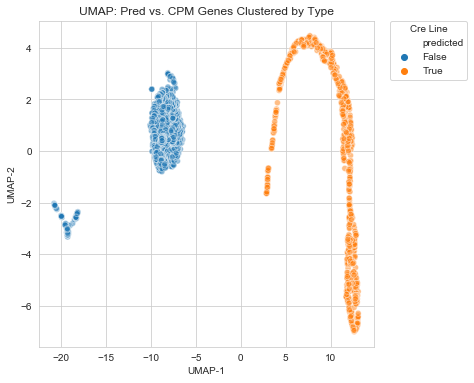

In [207]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('UMAP: Pred vs. CPM Genes Clustered by Type')
ax = sns.scatterplot(data=umapDf_combined, x='UMAP-1', y='UMAP-2', hue='predicted', 
                     alpha=0.5)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

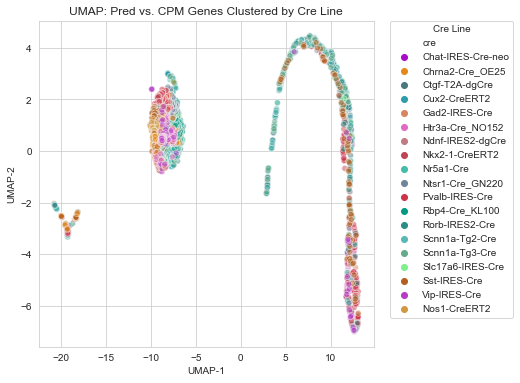

In [208]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('UMAP: Pred vs. CPM Genes Clustered by Cre Line')
ax = sns.scatterplot(data=umapDf_combined, x='UMAP-1', y='UMAP-2', hue='cre', 
                     alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

In [188]:
# Perform z-score transformation on each cell

from scipy import stats

z_combined = stats.zscore(combined_raw, axis=0)
pd.DataFrame(z_combined)
    

,0,1,2,3,4,5,6,7,8,9,...,10431,10432,10433,10434,10435,10436,10437,10438,10439,10440
0,0.333482,0.248786,-0.175571,0.093605,0.841827,0.265670,1.095010,-0.585880,0.553234,0.219383,...,-0.163318,-0.298448,-0.360465,0.149427,0.317215,-0.186606,0.538766,-0.310087,-0.040965,-0.094609
1,0.462346,0.879175,-0.186930,0.434249,0.702786,0.808547,1.226125,0.487243,0.394971,0.259377,...,0.696605,0.148154,0.534116,0.235678,-0.470237,-0.600795,0.814193,-0.319697,0.923667,0.220537
2,0.784081,2.685622,-0.159191,0.387553,1.177710,0.703597,1.238285,-1.184807,0.820121,0.783663,...,-0.338499,0.433902,-0.505515,0.808521,0.366063,-0.387520,0.851793,-0.504214,0.053477,-0.259828
3,0.404262,-0.627728,-0.322947,0.820020,0.843263,0.322476,1.233320,0.548345,0.314127,-0.257483,...,0.275976,-1.170394,0.668448,1.221869,0.454513,-0.180606,0.346303,0.401753,0.115460,0.225707
4,0.465279,0.657639,-0.248818,0.719842,1.112151,0.588372,1.226567,0.217901,0.492475,0.357154,...,-0.474605,-1.097277,0.227426,0.553065,-0.202188,-0.797491,0.352841,0.082600,0.436742,-0.230840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.820623,-0.669593,-0.906317,-1.543713,-0.483649,0.331980,-0.828957,3.105369,0.225045,-0.669309,...,-0.596222,-0.557360,-0.737646,-0.988760,-1.131833,0.908137,-0.634287,-0.913330,-0.634321,-0.346471
2156,-2.068760,-0.669593,1.029931,0.518221,0.146272,0.468829,-1.173211,-0.866891,-2.367892,-0.669309,...,-0.711325,-0.630330,-0.737646,-1.035316,-1.120316,-1.272570,-0.676502,-0.507911,-0.699029,-0.860541
2157,-0.644826,0.416336,1.251222,0.474649,-0.119585,-0.382271,0.101283,1.895943,-0.436888,0.538020,...,1.283270,2.341615,2.560333,0.110694,0.043431,0.476989,-0.772558,1.813985,2.292219,1.702062
2158,-0.632816,0.897671,1.321613,0.440142,-0.013389,-0.251645,0.190938,1.785346,-0.473361,0.565362,...,1.222707,2.427144,2.580723,0.133612,0.000407,0.521212,-0.757884,1.788228,2.285459,1.762235


In [189]:
# Run UMAP on z-score matrix

reducer = umap.UMAP()

embedding = reducer.fit_transform(z_combined)

umapDf_z = pd.DataFrame(data=embedding, columns=['UMAP-1', 'UMAP-2'])
umapDf_z

,UMAP-1,UMAP-2
0,-6.030657,-5.501183
1,-2.376048,-4.150283
2,-3.265838,-4.352739
3,-4.406207,-2.090968
4,-3.971446,-3.539718
...,...,...
2155,-6.772066,-3.357507
2156,-6.779211,-3.140562
2157,-3.115160,-1.063367
2158,-3.142550,-1.053294


In [190]:
# Add cre and metadata to z-score UMAP matrix

cre = predicted['mouse_line'].append(cpm_match_filtered['cre_driver_1'])
cre.reset_index(drop=True, inplace=True)

pred = combined['predicted']
pred.reset_index(drop=True, inplace=True)

umapDf_z = pd.concat([umapDf_z, cre, pred], axis=1)
umapDf_z.columns = ['UMAP-1', 'UMAP-2', 'cre', 'predicted']
umapDf_z

,UMAP-1,UMAP-2,cre,predicted
0,-6.030657,-5.501183,Chat-IRES-Cre-neo,True
1,-2.376048,-4.150283,Chat-IRES-Cre-neo,True
2,-3.265838,-4.352739,Chat-IRES-Cre-neo,True
3,-4.406207,-2.090968,Chat-IRES-Cre-neo,True
4,-3.971446,-3.539718,Chat-IRES-Cre-neo,True
...,...,...,...,...
2155,-6.772066,-3.357507,Vip-IRES-Cre,False
2156,-6.779211,-3.140562,Vip-IRES-Cre,False
2157,-3.115160,-1.063367,Vip-IRES-Cre,False
2158,-3.142550,-1.053294,Vip-IRES-Cre,False


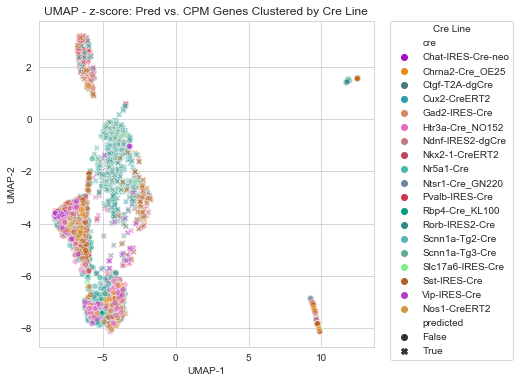

In [202]:
# Plot both predicted and cpm genes in one overlaying Seaborn plot

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('UMAP - z-score: Pred vs. CPM Genes Clustered by Cre Line')
ax = sns.scatterplot(data=umapDf_z, x='UMAP-1', y='UMAP-2', hue='cre', 
                     style='predicted', alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")


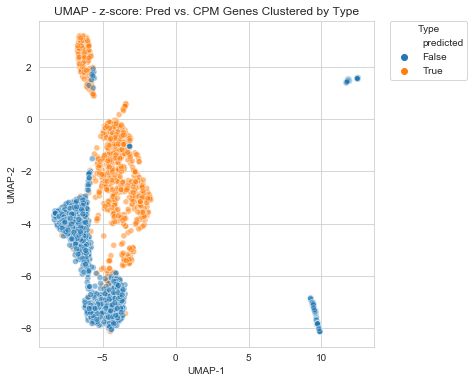

In [205]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('UMAP - z-score: Pred vs. CPM Genes Clustered by Type')
ax = sns.scatterplot(data=umapDf_z, x='UMAP-1', y='UMAP-2', hue='predicted', 
                     alpha=0.5)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Type")



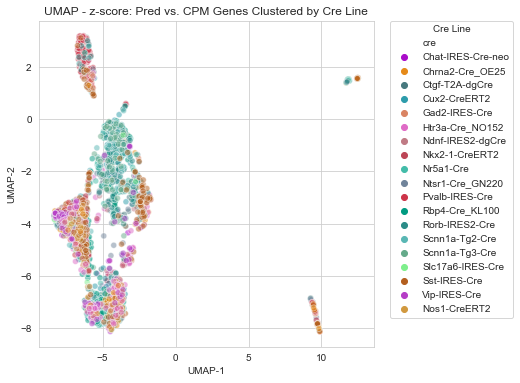

In [206]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('UMAP - z-score: Pred vs. CPM Genes Clustered by Cre Line')
ax = sns.scatterplot(data=umapDf_z, x='UMAP-1', y='UMAP-2', hue='cre', 
                    alpha=0.5, palette=cre_line_palette)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Line")

